In [2]:
import skimage
import numpy as np
from collections import defaultdict, Counter
#from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
#from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from skimage import io
from skimage import transform, feature
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#import sys
import os.path
import time 

In [20]:
from pyimage.pipeline import ImagePipeline
from numpy.linalg import svd
from sklearn.decomposition import PCA

# Basic read/transform

In [107]:
os.listdir('image_test') 

['.DS_Store',
 'dining_chair',
 'dining_table',
 'futon_ANDO1714_3.jpg',
 'futon_BYSN1003_1.jpg',
 'futon_BYSN1032_0.jpg',
 'nightstand_ACBP1054_0.jpg',
 'nightstand_ANDO1522_1.jpg',
 'nightstand_ATF1862_1.jpg',
 'nightstand_ATF1863_0.jpg']

In [299]:
ns = skimage.io.imread('image_test/nightstand_ANDO1522_1.jpg')
ns.shape

(400, 400, 3)

In [300]:
ft = skimage.io.imread('image_test/futon_BYSN1003_1.jpg')
ft.shape

(400, 400, 3)

In [301]:
dc = skimage.io.imread('image_test/dining_chair/dining_chair_AAM1013_0.jpg')

In [302]:
print ns[0][0]
print ft[0][0]

[255 255 255]
[255 255 255]


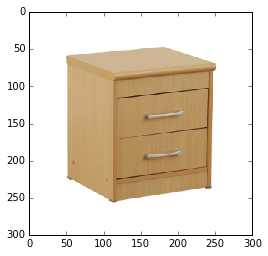

In [303]:
ns_s = transform.resize(ns, (300,300,3))
skimage.io.imshow(ns_s)

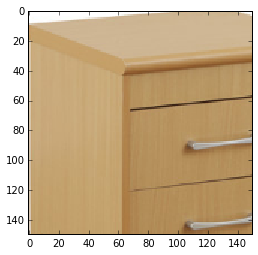

In [304]:
ns_room =  ns_s[50:200,50:200]
skimage.io.imshow(ns_room)

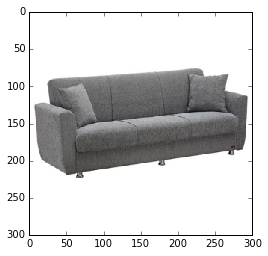

In [305]:
ft_s = transform.resize(ft, (300,300,3))
skimage.io.imshow(ft_s)

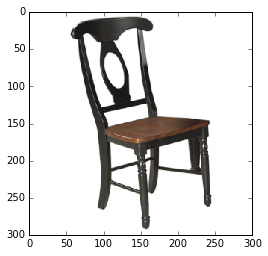

In [306]:
dc_s = transform.resize(dc, (300,300,3))
skimage.io.imshow(dc_s)

In [307]:
print ns_s[0][0]
print ft_s[0][0]

[ 1.  1.  1.]
[ 1.  1.  1.]


In [308]:
ns_gray = skimage.color.rgb2gray(ns_s)
ft_gray = skimage.color.rgb2gray(ft_s)
dc_gray = skimage.color.rgb2gray(dc_s)

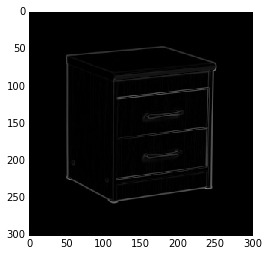

In [64]:
ns_sobal = skimage.filters.sobel(ns_gray)
skimage.io.imshow(ns_sobal)

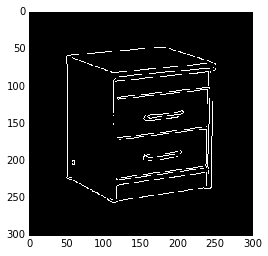

In [65]:
ns_canny = feature.canny(ns_gray, sigma=1)
skimage.io.imshow(ns_canny)

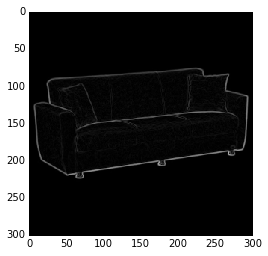

In [66]:
ft_sobal = skimage.filters.sobel(ft_gray)
skimage.io.imshow(ft_sobal)

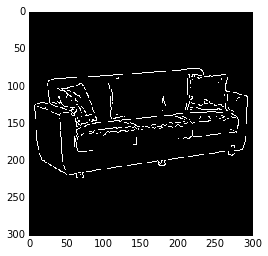

In [67]:
ft_canny = feature.canny(ft_gray, sigma=1)
skimage.io.imshow(ft_canny)

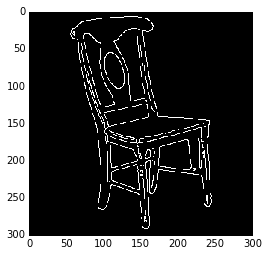

In [68]:
dc_canny = feature.canny(dc_gray, sigma=1)
skimage.io.imshow(dc_canny)

# Get dominant colors

In [80]:
def show_domi_color(image, n_clusters=3):
    nrow, ncol, depth = image.shape 
    lst_of_pixels = [image[irow][icol] for irow in range(nrow) for icol in range(ncol)]
    kmean = KMeans(n_clusters=n_clusters)
    kmean.fit_transform(lst_of_pixels)
    domi_colors = kmean.cluster_centers_ 
    domi_colors = domi_colors.reshape((1,n_clusters,3))
    skimage.io.imshow(domi_colors)
    return domi_colors

array([[[ 0.99545379,  0.99534742,  0.99499355],
        [ 0.260858  ,  0.23378773,  0.2103252 ]]])

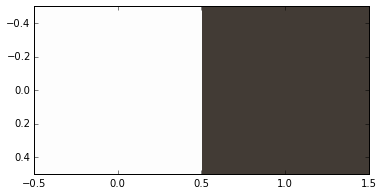

In [90]:
show_domi_color(dc_s,2)

array([[[ 0.41287307,  0.4111672 ,  0.4123232 ],
        [ 0.99697897,  0.99698345,  0.99703543]]])

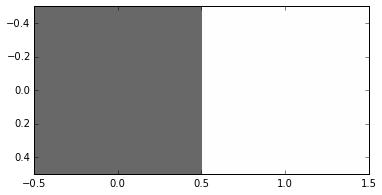

In [91]:
show_domi_color(ft_s,2)

array([[[ 0.99903168,  0.99878974,  0.99828544],
        [ 0.72569777,  0.59101235,  0.40156324]]])

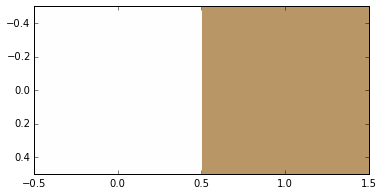

In [92]:
show_domi_color(ns_s,2)

array([[[ 0.32789879,  0.21762493,  0.14094831],
        [ 0.9122282 ,  0.83985693,  0.73882488]]])

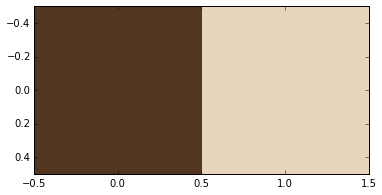

In [89]:
dc2 = skimage.io.imread('image_test/dining_chair/dining_chair_AAM1013_4.jpg')
dc2_s = transform.resize(dc2, (300,300,3))
show_domi_color(dc2_s,2)

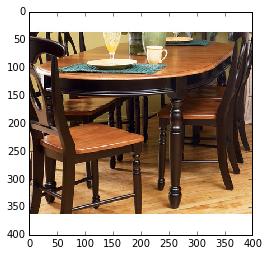

In [86]:
skimage.io.imshow(dc2)

array([[[ 0.91982567,  0.90630636,  0.90144896],
        [ 0.51153655,  0.44642687,  0.3575924 ]]])

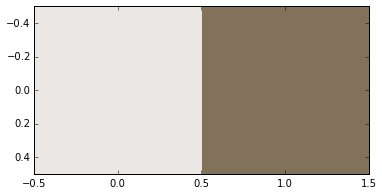

In [88]:
dc3 = skimage.io.imread('image_test/dining_chair/dining_chair_AAM1013_10.jpg')
dc3_s = transform.resize(dc3, (300,300,3))
show_domi_color(dc3_s,2)

array([[[ 0.61830123,  0.56360316,  0.49816156],
        [ 0.99590315,  0.99533759,  0.99440849]]])

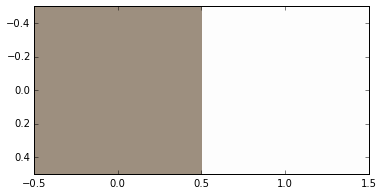

In [93]:
ns2 = skimage.io.imread('image_test/nightstand_ATF1863_0.jpg')
ns2_s = transform.resize(ns2, (300,300,3))
show_domi_color(ns2_s,2)

array([[[ 0.84835724,  0.8357177 ,  0.77182149],
        [ 0.64594748,  0.62315387,  0.40829908]]])

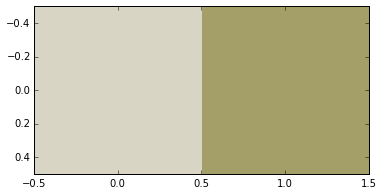

In [99]:
dc4 = skimage.io.imread('image_test/dining_chair/dining_chair_ADEC1338_4.jpg')
dc4_s = transform.resize(dc4, (300,300,3))
show_domi_color(dc4_s,2)

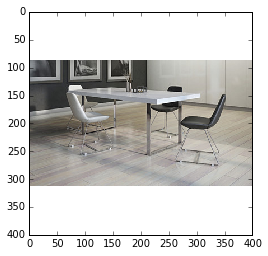

In [110]:
skimage.io.imshow(dt)

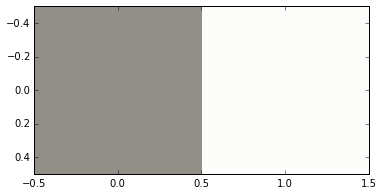

In [114]:
dt = skimage.io.imread('image_test/dining_table/dining_table_AEON1147_1.jpg')
dt_s = transform.resize(dt, (300,300,3))
domi_color = show_domi_color(dt_s,2)

In [117]:
domi_color[0]

array([[ 0.57300862,  0.56091193,  0.5370785 ],
       [ 0.98825312,  0.98839057,  0.98751723]])

# Clustering by dominant colors

### One way to tease out photos with white backgroud: find 2 dominant colors and one of them is white([x,x,x], all x>0.985)

## test sofa images:
* dir
* get dominant color for the furniture
* cluster

In [81]:
sofa_paths = os.listdir('image_test/sofa') 
len(sofa_paths)

112

In [82]:
chair_paths = os.listdir('image_test/dining_chair')
if chair_paths[0] == '.DS_Store':
    chair_paths = chair_paths[1:]
len(chair_paths)

1072

In [595]:
def get_domi_color_for_photo_with_white_background(paths):
    '''
    INPUT:
        paths: list, paths of image files
    For all files in paths, 
        tease out photos without a clear white background and save those into 'background' folder.
    For those with white background, save then to 'white' folder.
    OUTPUT:
        domi_color_dict: dictionary, key=path and value=dominant color(just one).
    '''
    domi_color_dict = {}
    
    for path in paths:
        category = '_'.join(path.split('_')[0:-2])
        image = skimage.io.imread('image_test/' + category + '/' + path)
        
        # If the picture is grayscale, discard it for now. Think about how to improve it later.
        
        if len(image.shape) == 2:
            print 'gray'
            continue
            
        image = transform.resize(image, (300,300,3))

        nrow, ncol, depth = image.shape 
        lst_of_pixels = [image[irow][icol] for irow in range(nrow) for icol in range(ncol)]

        """Remove photos without clean white background:
            If one of the two dominant color is white, 
            when the photo has a clean white background and flag=True."""

        kmean1 = KMeans(n_clusters=2)
        kmean1.fit_transform(lst_of_pixels)
        domi_colors_all = kmean1.cluster_centers_ 
        white_color_arr = np.array([0.98, 0.98, 0.98])
        

        flag = False
        for color in domi_colors_all:
            if np.mean(color>white_color_arr) == 1:
                flag = True
            else:
                domi_color = color

        if not flag:    
            new_path = 'image_test_result/background/' + path
            skimage.io.imsave(new_path, image)
            continue
        else:
            new_path = 'image_test_result/white/' + path
            skimage.io.imsave(new_path, image)
            domi_color_dict[path] = domi_color 
        
    return domi_color_dict


9:45

In [596]:
domi_color_dict = get_domi_color_for_photo_with_white_background(chair_paths)

9:52

In [89]:
len(domi_color_dict.keys())

680

In [199]:
def clustering_with_domi_color(domi_color_dict, category, n_clusters=6):
    '''
    INPUT: domi_color_dict:
            * key: path
            * value: dominant color (just one)
    
    Cluster by color & save files to different folders according to labels.
    
    OUTPUT: cluster_label_dict
            * key: path
            * value: cluster label
            color_centroids:
            * index: label 
            * value: centroid
    '''
    domi_color_values = domi_color_dict.values()
    
    domi_color_reverse_dict = {}
    for i, j in domi_color_dict.iteritems():
        domi_color_reverse_dict[tuple(j)] = i 
        
    km_color = KMeans(n_clusters=n_clusters)
    domi_colors_labels =km_color.fit_predict(domi_color_values)
    
    color_centroids = km_color.cluster_centers_
             
    cluster_label_dict = {}
    for i, j in enumerate(domi_color_values):
        label = domi_colors_labels[i]
        path = domi_color_reverse_dict[tuple(j)]
        cluster_label_dict[path] = label
        
        image = skimage.io.imread('image_test/' + category + '/' + path)
        new_path = 'image_test_result/' + str(label) + '/' + path
        skimage.io.imsave(new_path, image)
    
    return cluster_label_dict, color_centroids

In [95]:
cluster_label_dict, color_centroids = clustering_with_domi_color(domi_color_dict, 'dining_chair', n_clusters=12)

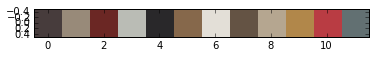

In [96]:
color_centroids = color_centroids.reshape((1,12,3))
skimage.io.imshow(color_centroids)

# Clustering by features:

In [670]:
image_pipe = ImagePipeline('image_test_result/')
image_pipe.read(sub_dirs=('white',))

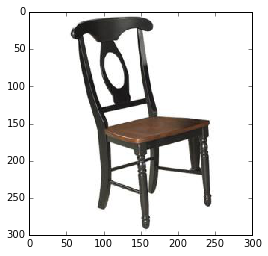

In [671]:
image_pipe.show('white', 0)

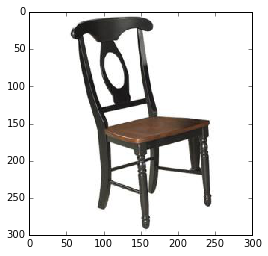

In [672]:
skimage.io.imshow(image_pipe.img_lst2[0][0])

In [673]:
image_pipe.resize((150,150,3))
image_pipe.transform(skimage.color.rgb2gray, {})
image_pipe.vectorize()
features = image_pipe.features

In [674]:
features.shape

(679, 22500)

In [675]:
chair_paths = os.listdir('image_test_result/white')
if chair_paths[0] == '.DS_Store':
    chair_paths = chair_paths[1:]
len(chair_paths)

679

In [676]:
feature_dict = {}
for i in xrange(len(chair_paths)):
    path = chair_paths[i]
    feature = features[i]
    feature_dict[path] = feature

In [6]:
def clustering_with_feature(feature_dict, n_clusters=6, svd=False, save_image=True, edge=False):
    '''
    INPUT: feature_dict:
            * key: path
            * value: feature
    
    Cluster by feature & save files to different folders according to labels.
    
    OUTPUT: cluster_label_dict
            * key: path
            * value: cluster label
            feature_centroids:
            * index: label 
            * value: centroid
    '''
    feature_values = feature_dict.values()
    
    feature_reverse_dict = {}
    for i, j in feature_dict.iteritems():
        feature_reverse_dict[tuple(j)] = i 
        
    km_feature = KMeans(n_clusters=n_clusters)
    feature_labels = km_feature.fit_predict(feature_values)
    
    feature_centroids = km_feature.cluster_centers_
             
    cluster_label_dict = {}
    for i, j in enumerate(feature_values):
        label = feature_labels[i]
        path = feature_reverse_dict[tuple(j)]
        cluster_label_dict[path] = label
        
        if save_image:
            image = skimage.io.imread('image_test_result/same_angle/' + path)
            if svd:
                new_path = 'image_test_result/features_svd/' + str(label) + '/' + path
            elif edge:
                new_path = 'image_test_result/features_edge/' + str(label) + '/' + path
            else:
                new_path = 'image_test_result/features/' + str(label) + '/' + path
            skimage.io.imsave(new_path, image)
    
    return cluster_label_dict, feature_centroids

In [680]:
cluster_label_dict, feature_centroids = clustering_with_feature(feature_dict, n_clusters=10)

In [681]:
Counter(cluster_label_dict.values())

Counter({0: 90, 1: 239, 2: 9, 3: 19, 4: 45, 5: 99, 6: 34, 7: 59, 8: 26, 9: 59})

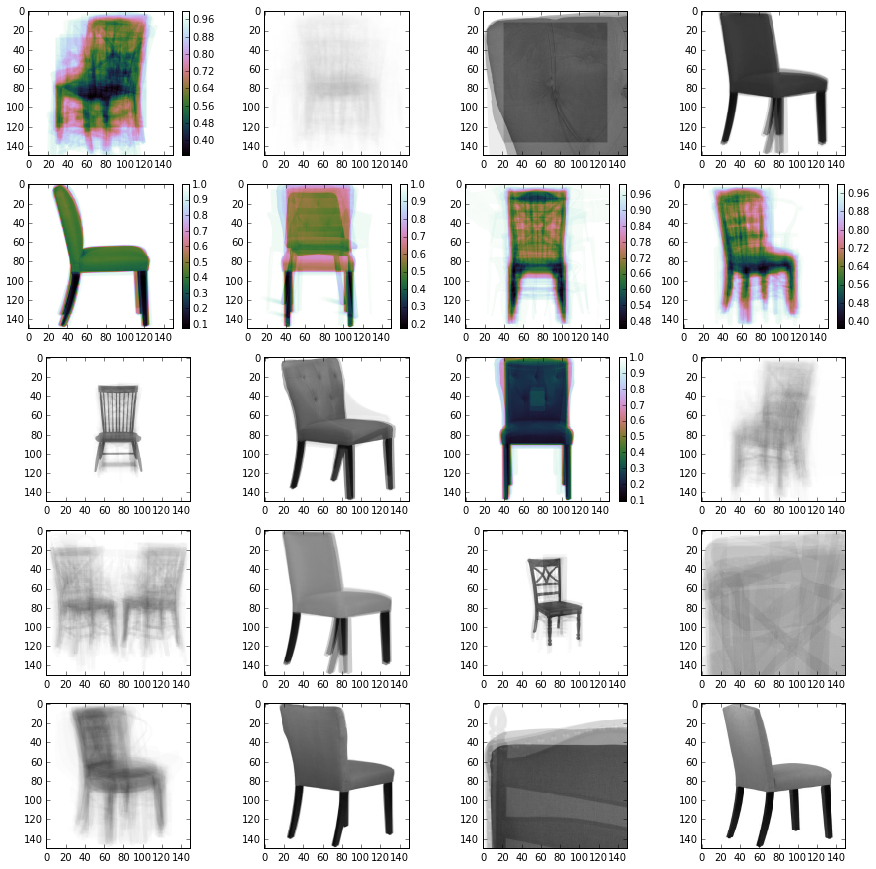

In [234]:
plt.figure(figsize = (15,15))
for i in range(20):
    plt.subplot(5,4,i+1)
    skimage.io.imshow(feature_centroids[i].reshape(150,150))

# SVD!

In [128]:
features.shape

(680, 22500)

In [131]:
print time.ctime(time.time())
U, sigma, VT = svd(features)
print time.ctime(time.time())

'Thu Sep 24 22:53:07 2015'

In [132]:
U.shape, sigma.shape, VT.shape

((680, 680), (680,), (22500, 22500))

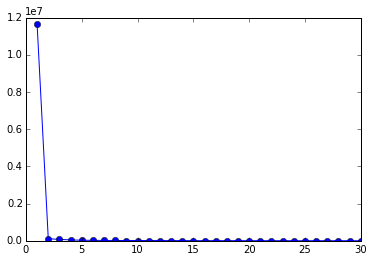

In [135]:
plt.plot(range(1,31),sigma[:30]**2, '-o')

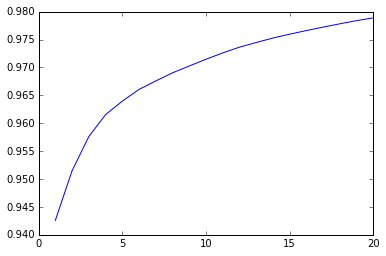

In [139]:
k = 20
plt.plot(range(1, k+1), np.cumsum(sigma[:k]**2) / np.sum(sigma**2))

# Reduce feature dimension to 20:

In [143]:
features_reduced = U[:,:20]
features_reduced.shape

(680, 20)

In [144]:
feature_reduced_dict = {}
for i in xrange(len(chair_paths)):
    path = chair_paths[i]
    feature = features_reduced[i]
    feature_reduced_dict[path] = feature

# Cluster by dimension-reduced features

In [235]:
cluster_label_dict_reduced, feature_reduced_centroids = clustering_with_feature(feature_reduced_dict, 
                                                                                n_clusters=20, svd=True, save_image=False)

# Display average image for each label:

In [236]:
label_dict = defaultdict(list)
for i,j in cluster_label_dict_reduced.iteritems():
    label_dict[j].append(i)

In [238]:
label_image_avg = {}
for i in label_dict:
    for j, path in enumerate(label_dict[i]):
        image = skimage.io.imread('image_test_result/white/' + path)
        image = transform.resize(image, (300,300,3))
        if j == 0:
            sum_image = image
            length = 1
        else:
            sum_image = sum_image + image
            length += 1
    label_image_avg[i] = sum_image/length

In [239]:
len(label_image_avg)

20

In [240]:
label_image_avg[0].shape

(300, 300, 3)

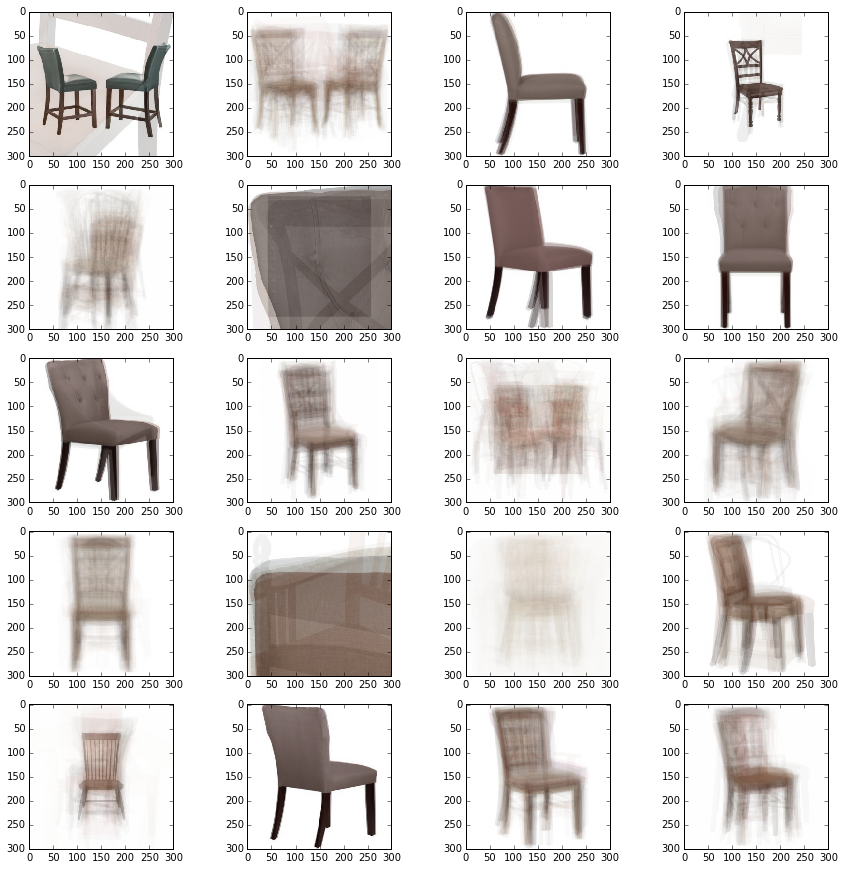

In [241]:
plt.figure(figsize = (15,15))
for i in range(20):
    plt.subplot(5,4,i+1)
    skimage.io.imshow(label_image_avg[i])

In [242]:
Counter(cluster_label_dict_reduced.values())

Counter({0: 4,
         1: 36,
         2: 34,
         3: 14,
         4: 39,
         5: 16,
         6: 29,
         7: 36,
         8: 16,
         9: 23,
         10: 31,
         11: 41,
         12: 59,
         13: 16,
         14: 145,
         15: 20,
         16: 46,
         17: 14,
         18: 28,
         19: 33})

# Thoughs for color: instead of one dominant color, get a color distribution vector with binned frequency of ranges of R, G, B respectively. Get rid of perfectly white points ahead of time.

In [243]:
color_centroids

array([[[ 0.278679  ,  0.23814766,  0.23585203],
        [ 0.59842016,  0.54213813,  0.4758983 ],
        [ 0.4223179 ,  0.15681925,  0.14352783],
        [ 0.73172618,  0.7386802 ,  0.71253401],
        [ 0.16280493,  0.15891385,  0.16734576],
        [ 0.5274559 ,  0.41170267,  0.29666748],
        [ 0.89033051,  0.87836326,  0.84640622],
        [ 0.39477129,  0.32819736,  0.26720684],
        [ 0.71351227,  0.65162335,  0.56738345],
        [ 0.69518263,  0.53318624,  0.29092351],
        [ 0.72588293,  0.23570623,  0.264775  ],
        [ 0.38769169,  0.44236639,  0.44815196]]])

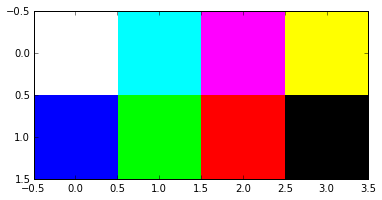

In [291]:
skimage.io.imshow(np.array([[[1., 1., 1.], [0., 1.,1.],  [1., 0.,1.],  [1., 1.,0.]],
                           [[0., 0., 1.], [0., 1,0.],  [1., 0.,0.],  [0., 0.,0.]]]))

In [287]:
a = np.array([[[255, 255, 255], [0, 255, 255],  [255, 0, 255],  [255, 255, 0]],
             [[0, 0, 255], [0, 255, 0],  [255, 0, 0],  [0, 0, 0]]])
a = np.uint8(a)

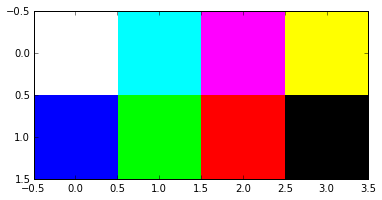

In [288]:
skimage.io.imshow(a)

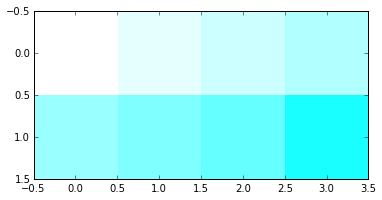

In [289]:
skimage.io.imshow(np.array([[[1., 1., 1.], [0.9, 1.,1.],  [0.8, 1.,1.],  [0.7, 1.,1.]],
                           [[0.6, 1.,1.], [0.5, 1.,1.],  [0.4, 1.,1.],  [0.1, 1.,1.]]]))

# Standard scaler in sklearn for grayscaled images doesn't work well:

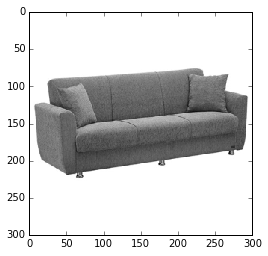

In [328]:
skimage.io.imshow(ft_gray)

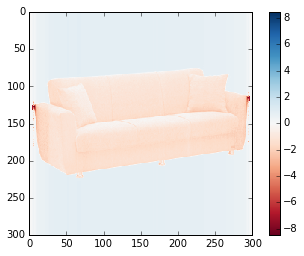

In [327]:
skimage.io.imshow(StandardScaler().fit_transform(ft_gray))

In [322]:
np.std(dc_gray)

0.30040191408138872

In [326]:
np.min(StandardScaler(with_mean=True, with_std=True).fit_transform(dc_gray))

-10.685459923352798

# Color distribution:

In [382]:
def plot_color_distribution_with_white(image):
    nrow, ncol, depth = image.shape 
    lst_of_pixels = np.array([image[irow][icol] for irow in range(nrow) for icol in range(ncol)])
    
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    skimage.io.imshow(image)
    plt.subplot(1,2,2)
    plt.hist(lst_of_pixels[:,0], bins=50, color='r', alpha=0.3)
    plt.hist(lst_of_pixels[:,1], bins=50, color='g', alpha=0.3)
    plt.hist(lst_of_pixels[:,2], bins=50, color='b', alpha=0.3)

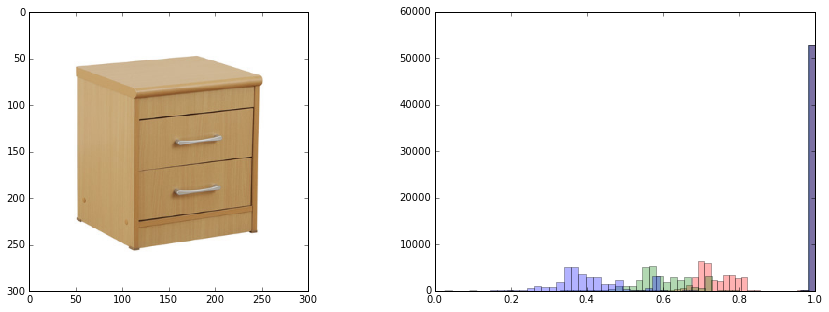

In [383]:
plot_color_distribution_with_white(ns_s)

In [527]:
def plot_color_distribution(image, bins=50):
     
    image = transform.resize(image, (300,300,3))
    nrow, ncol, depth = image.shape
    
    white_pixel = np.array([ .99, .99, .99])
    lst_of_pixels = np.array([image[irow][icol] for irow in range(nrow) for icol in range(ncol) if np.mean(image[irow][icol]>white_pixel) != 1])
    
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    skimage.io.imshow(image)
    plt.subplot(1,2,2)
    plt.hist(lst_of_pixels[:,0], bins=bins, color='r', alpha=0.3)
    plt.hist(lst_of_pixels[:,1], bins=bins, color='g', alpha=0.3)
    plt.hist(lst_of_pixels[:,2], bins=bins, color='b', alpha=0.3)

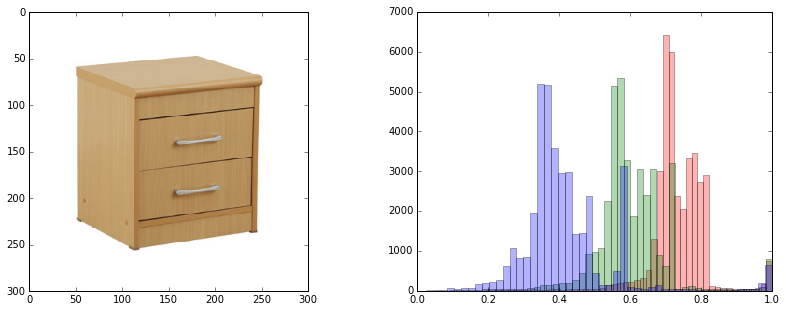

In [385]:
plot_color_distribution(ns_s)

In [386]:
sf_r = skimage.io.imread('image_test/sofa/sofa_BL3429_19.jpg')

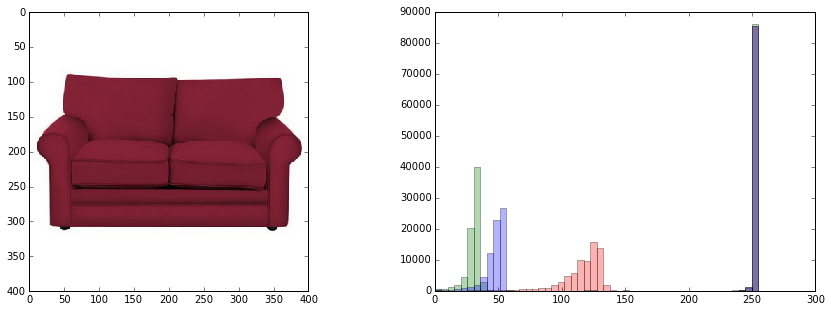

In [387]:
plot_color_distribution_with_white(sf_r)

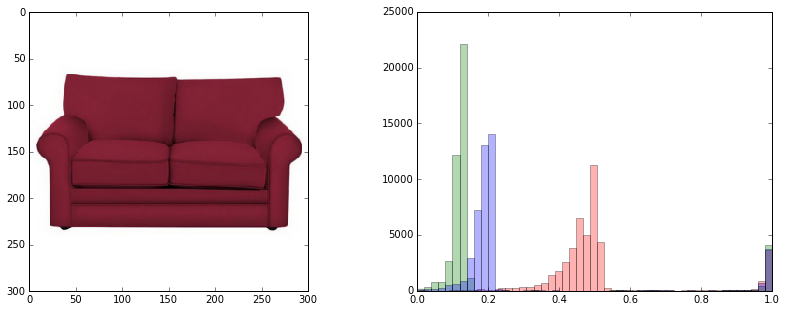

In [388]:
sf_r_s = transform.resize(sf_r, (300,300,3))
plot_color_distribution(sf_r_s)

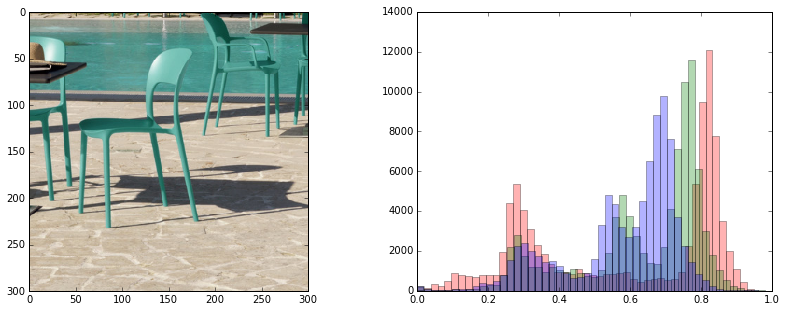

In [400]:
dc_b = skimage.io.imread('image_test/dining_chair/dining_chair_BTC1291_15.jpg')
dc_b_s = transform.resize(dc_b, (300,300,3))

plot_color_distribution(dc_b_s)

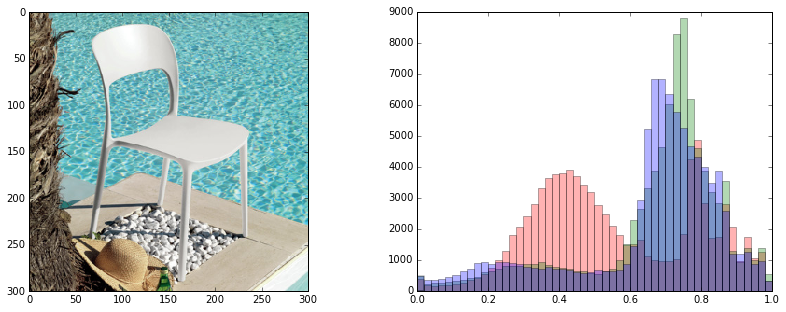

In [435]:
dc_b = skimage.io.imread('image_test/dining_chair/dining_chair_BTC1291_14.jpg')
dc_b_s = transform.resize(dc_b, (300,300,3))

plot_color_distribution(dc_b_s)
plt.show()

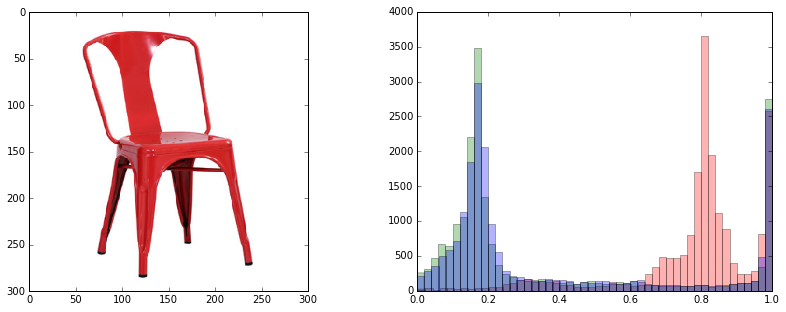

In [402]:
dc_b = skimage.io.imread('image_test/dining_chair/dining_chair_BUF1659_1.jpg')
dc_b_s = transform.resize(dc_b, (300,300,3))

plot_color_distribution(dc_b_s)

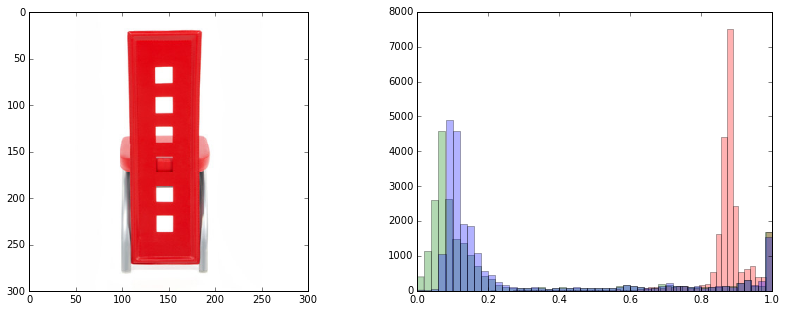

In [656]:
dc_b = skimage.io.imread('image_test/dining_chair/dining_chair_CST7944_3.jpg')
dc_b_s = transform.resize(dc_b, (300,300,3))

plot_color_distribution(dc_b_s)

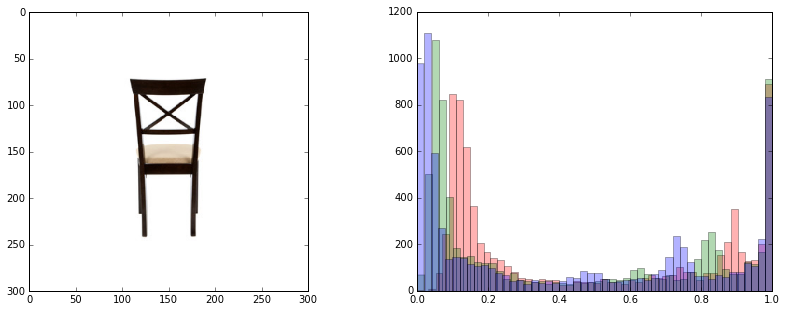

In [657]:
dc_b = skimage.io.imread('image_test/dining_chair/dining_chair_CST1945_8.jpg')
dc_b_s = transform.resize(dc_b, (300,300,3))

plot_color_distribution(dc_b_s)

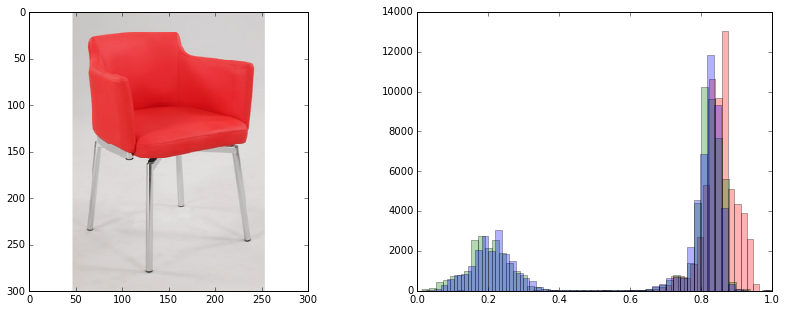

In [403]:
dc_b = skimage.io.imread('image_test/dining_chair/dining_chair_CNI3124_1.jpg')
dc_b_s = transform.resize(dc_b, (300,300,3))

plot_color_distribution(dc_b_s)

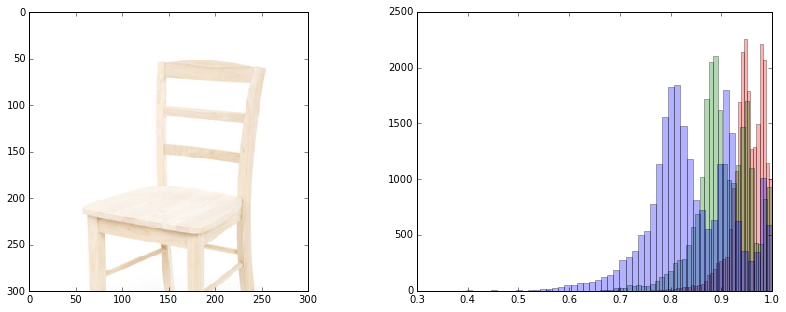

In [441]:
dc_b = skimage.io.imread('image_test/dining_chair/dining_chair_ATGR1106_17.jpg')
dc_b_s_1 = transform.resize(dc_b, (300,300,3))

plot_color_distribution(dc_b_s_1)

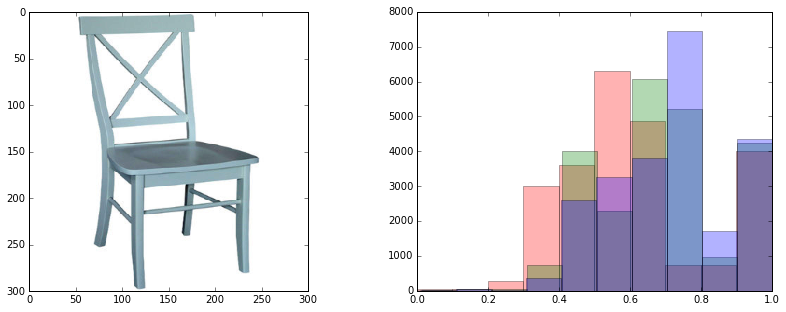

In [508]:
plot_color_distribution(skimage.exposure.rescale_intensity(dc_b_s), bins=10)

In [522]:
dc_b = skimage.io.imread('image_test/dining_chair/dining_chair_ATGR1030_2.jpg')
dc_b_s = transform.resize(dc_b, (300,300,3))

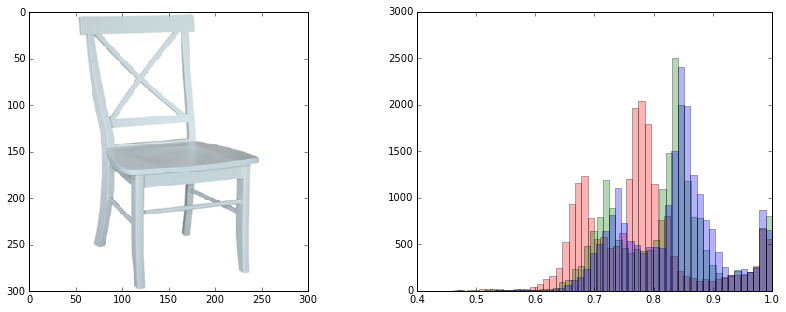

In [528]:
plot_color_distribution(dc_b_s, bins=50)

# Vectorize color distribution!

In [650]:
def vectorize_color_distribution(paths):
    
    '''INPUT:
            paths: list of strings
                file paths
       OUTPUT:
            color_dist_dict: dictionary 
                key: path 
                value: vectorized color distribution (a 1D numpy array of 30 numbers representing RBG 
                                                        intensities, 10 numbers for each color)
    '''
    
    color_dist_dict = {}
    
    for path in paths:
        #category = '_'.join(path.split('_')[0:-2])
        
        image = skimage.io.imread('image_test_result/' + 'white' + '/' + path)
        image = transform.resize(image, (300,300,3))
    
        nrow, ncol, depth = image.shape 
        white_pixel = np.array([ .99, .99, .99])
        lst_of_pixels = np.array([image[irow][icol] for irow in range(nrow) for icol in range(ncol) if np.mean(image[irow][icol]>white_pixel) != 1])

        red_values = lst_of_pixels[:,0]
        green_values = lst_of_pixels[:,1]
        blue_values = lst_of_pixels[:,2]

        (n_red, bins) = np.histogram(red_values, bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
        (n_green, bins) = np.histogram(green_values, bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
        (n_blue, bins) = np.histogram(blue_values, bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
        
        num_of_pixels = float(len(lst_of_pixels))
        n_red = n_red / num_of_pixels
        n_green = n_green / num_of_pixels
        n_blue = n_blue / num_of_pixels

        color_dist_vector = np.hstack((n_red, n_green, n_blue))
        color_dist_dict[path] = color_dist_vector
        
    return color_dist_dict

In [651]:
white_paths = os.listdir('image_test_result/white') 

8:27

In [652]:
color_dist_dict = vectorize_color_distribution(white_paths)

< 8:42

# Cluster with color distrubution vector:

In [661]:
def clustering_with_color_dist(color_dist_dict, category, n_clusters=6):
    '''
    INPUT: color_dist_dict:
            * key: path
            * value: color distribution vector
    
    Cluster by color & save files to different folders according to labels.
    
    OUTPUT: cluster_label_dict
            * key: path
            * value: cluster label
            color_dist_centroids:
            * index: label 
            * value: centroid
    '''
    color_dist_values = color_dist_dict.values()
    
    color_dist_reverse_dict = {}
    for i, j in color_dist_dict.iteritems():
        color_dist_reverse_dict[tuple(j)] = i 
        
    km_color = KMeans(n_clusters=n_clusters)
    color_dist_labels =km_color.fit_predict(color_dist_values)
    
    color_dist_centroids = km_color.cluster_centers_
             
    cluster_label_dict = {}
    for i, j in enumerate(color_dist_values):
        label = color_dist_labels[i]
        path = color_dist_reverse_dict[tuple(j)]
        cluster_label_dict[path] = label
        
        image = skimage.io.imread('image_test/' + category + '/' + path)
        new_path = 'image_test_result/color_dist/' + str(label) + '/' + path
        skimage.io.imsave(new_path, image)
    
    return cluster_label_dict, color_centroids

In [662]:
cluster_label_dict, color_centroids = clustering_with_color_dist(color_dist_dict, 'dining_chair', n_clusters=20)

# The color_distribution clustering result is worse than dominant_color clustering....@__@

# Clustering with edged_features:

In [22]:
image_pipe = ImagePipeline('image_test_result/')
image_pipe.read(sub_dirs=('white',))

image_pipe.resize((150,150,3))
image_pipe.transform(skimage.color.rgb2gray, {})
image_pipe.transform(skimage.feature.canny, {})

image_pipe.vectorize()
features_edged = image_pipe.features
print features_edged.shape

chair_paths = os.listdir('image_test_result/white')
if chair_paths[0] == '.DS_Store':
    chair_paths = chair_paths[1:]
print len(chair_paths)

feature_dict = {}
for i in xrange(len(chair_paths)):
    path = chair_paths[i]
    feature = features_edged[i]
    feature_dict[path] = feature

cluster_label_dict_edged, feature_edged_centroids = clustering_with_feature(feature_dict, 
                                                                                n_clusters=10, edge=True, save_image=False)

(679, 22500)
679


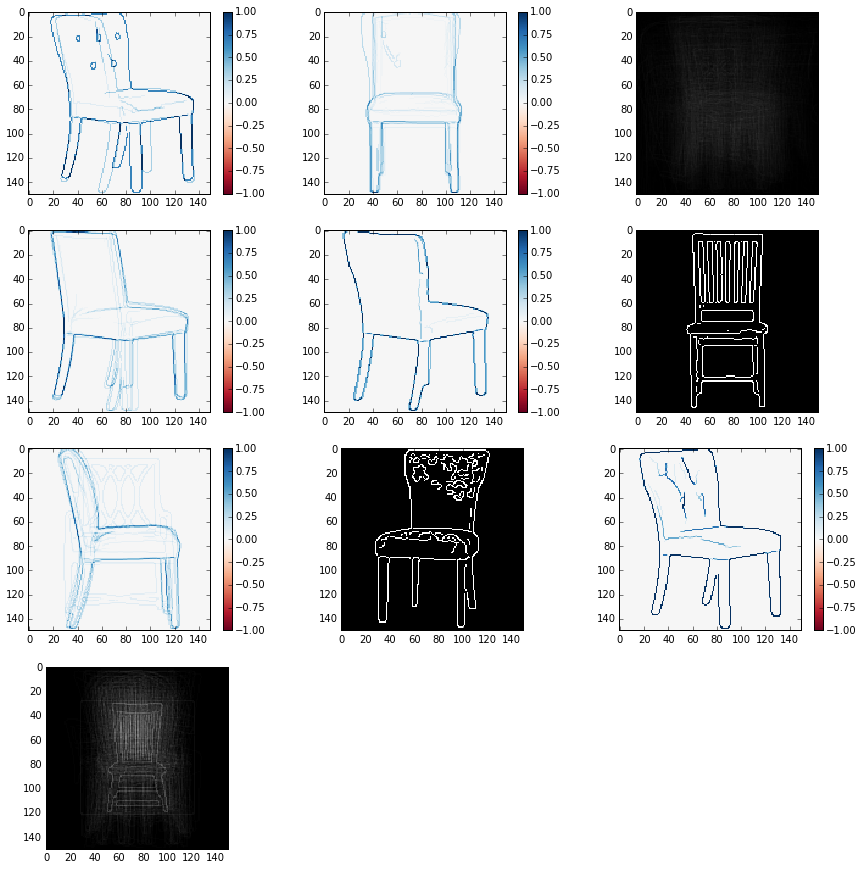

In [23]:
plt.figure(figsize = (15,15))
for i in range(10):
    plt.subplot(4,3,i+1)
    skimage.io.imshow(feature_edged_centroids[i].reshape(150,150))

# Results not so good! Many cluster has only a few photos.

# Now Working with same angled chair photos:

# Clustering with features - same angled chair photos:

In [7]:
image_pipe = ImagePipeline('image_test_result/')
image_pipe.read(sub_dirs=('same_angle',))

image_pipe.resize((150,150,3))
image_pipe.transform(skimage.color.rgb2gray, {})
#image_pipe.transform(skimage.feature.canny, {})

image_pipe.vectorize()
features = image_pipe.features
print features.shape

chair_paths = os.listdir('image_test_result/same_angle')
if chair_paths[0] == '.DS_Store':
    chair_paths = chair_paths[1:]
print len(chair_paths)

feature_dict = {}
for i in xrange(len(chair_paths)):
    path = chair_paths[i]
    feature = features[i]
    feature_dict[path] = feature

cluster_label_dict, feature_centroids = clustering_with_feature(feature_dict, 
                                                                n_clusters=10, save_image=True)

(209, 22500)
209


//anaconda/lib/python2.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warnings.warn("Float image out of standard range; displaying "


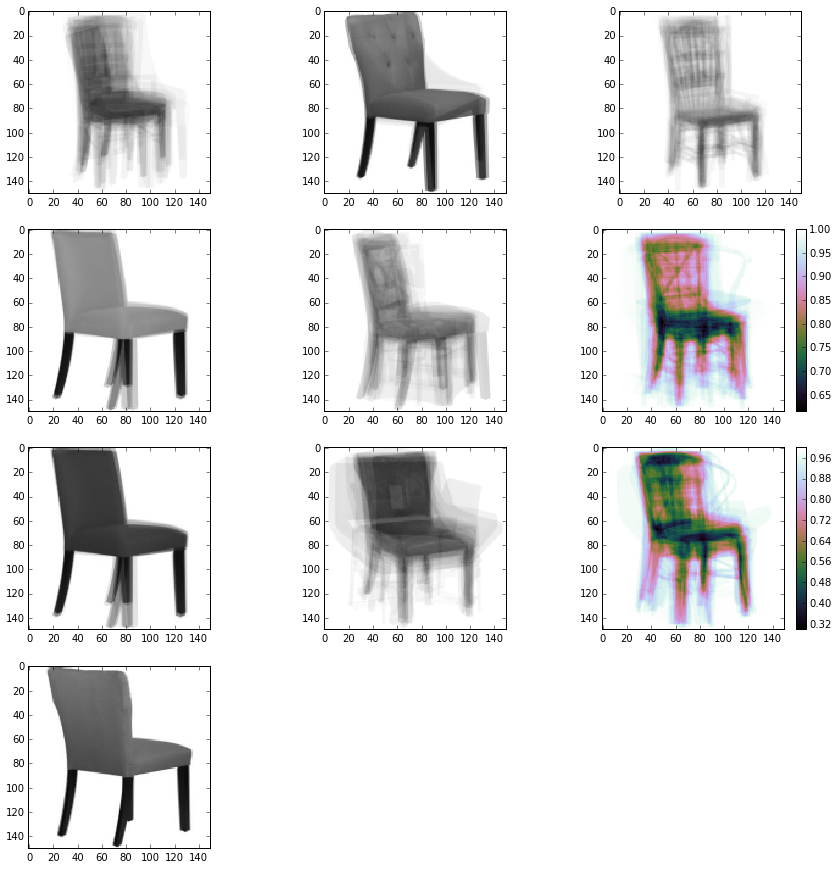

In [8]:
plt.figure(figsize = (15,15))
for i in range(10):
    plt.subplot(4,3,i+1)
    skimage.io.imshow(feature_centroids[i].reshape(150,150))

# Clustering with edged_features - same angled chair photos:

In [10]:
image_pipe = ImagePipeline('image_test_result/')
image_pipe.read(sub_dirs=('same_angle',))

image_pipe.resize((150,150,3))
image_pipe.transform(skimage.color.rgb2gray, {})
image_pipe.transform(skimage.feature.canny, {})

image_pipe.vectorize()
features_edged = image_pipe.features
print features_edged.shape

chair_paths = os.listdir('image_test_result/same_angle')
if chair_paths[0] == '.DS_Store':
    chair_paths = chair_paths[1:]
print len(chair_paths)

feature_dict = {}
for i in xrange(len(chair_paths)):
    path = chair_paths[i]
    feature = features_edged[i]
    feature_dict[path] = feature

cluster_label_dict_edged, feature_edged_centroids = clustering_with_feature(feature_dict, 
                                                                                n_clusters=10, edge=True, save_image=True)

(209, 22500)
209


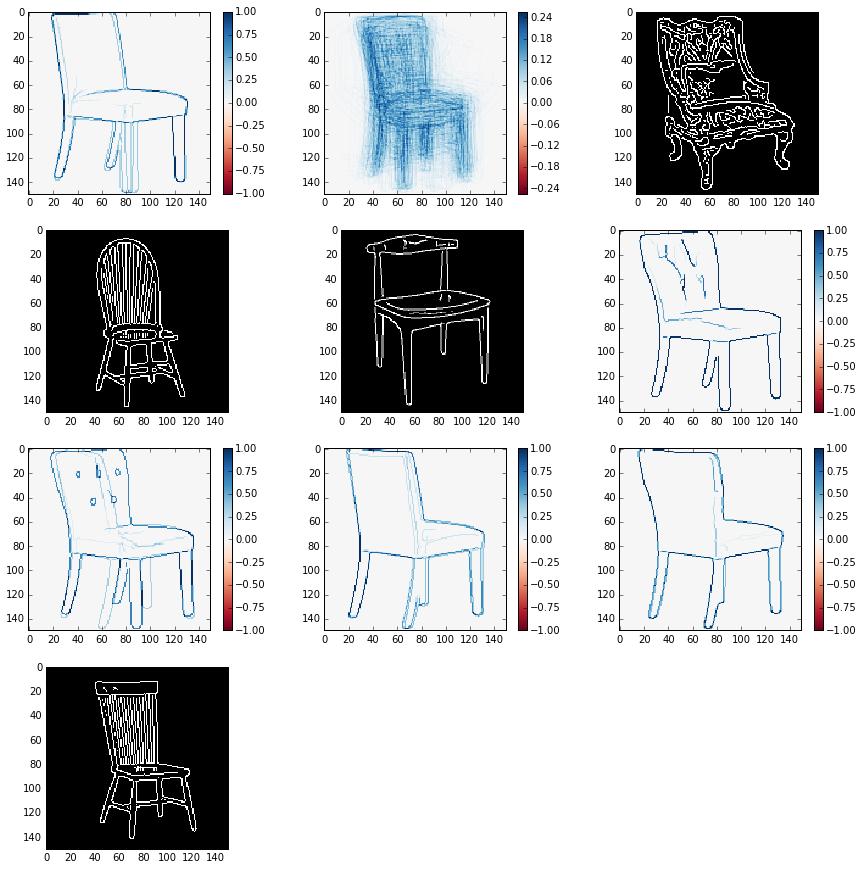

In [11]:
plt.figure(figsize = (15,15))
for i in range(10):
    plt.subplot(4,3,i+1)
    skimage.io.imshow(feature_edged_centroids[i].reshape(150,150))

# Clustering with SVD & edged features - same angled chair photos:

In [12]:
print time.ctime(time.time())
U, sigma, VT = svd(features_edged)
print time.ctime(time.time())

Sun Sep 27 16:32:12 2015
Sun Sep 27 16:35:01 2015


In [17]:
sigma.shape

(209,)

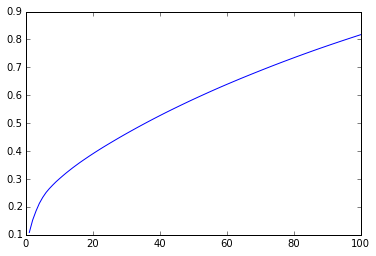

In [21]:
k = 100
plt.plot(range(1, k+1), np.cumsum(sigma[:k]**2) / np.sum(sigma**2))

In [22]:
features_reduced = U[:,:100]

feature_reduced_dict = {}
for i in xrange(len(chair_paths)):
    path = chair_paths[i]
    feature = features_reduced[i]
    feature_reduced_dict[path] = feature

In [23]:
cluster_label_dict_reduced, feature_reduced_centroids = clustering_with_feature(feature_reduced_dict, 
                                                                                n_clusters=10, svd=True, save_image=True)

# Clustering with SVD features - same angled chair photos:

In [24]:
print time.ctime(time.time())
U, sigma, VT = svd(features)
print time.ctime(time.time())

Sun Sep 27 16:40:39 2015
Sun Sep 27 16:45:19 2015


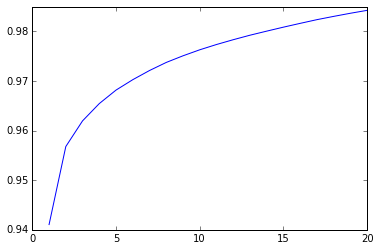

In [31]:
k = 20
plt.plot(range(1, k+1), np.cumsum(sigma[:k]**2) / np.sum(sigma**2))

In [25]:
len(chair_paths)

209

In [32]:
features_reduced = U[:,:20]
features_reduced.shape

(209, 20)

In [33]:
feature_reduced_dict = {}
for i in xrange(len(chair_paths)):
    path = chair_paths[i]
    feature = features_reduced[i]
    feature_reduced_dict[path] = feature

cluster_label_dict_reduced, feature_reduced_centroids = clustering_with_feature(feature_reduced_dict, 
                                                                                n_clusters=10, svd=True, save_image=True)

# Try rescaling exposure!

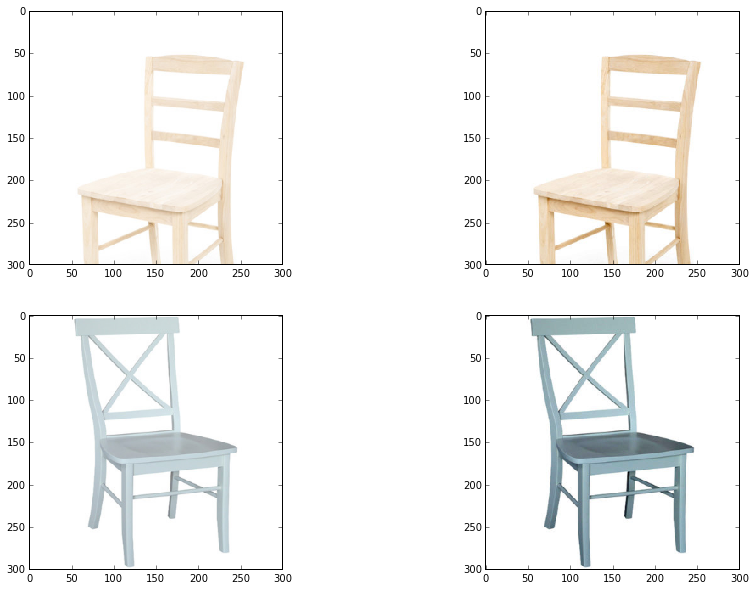

In [447]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
skimage.io.imshow(dc_b_s_1)
plt.subplot(2,2,2)
skimage.io.imshow(skimage.exposure.rescale_intensity(dc_b_s_1))
plt.subplot(2,2,3)
skimage.io.imshow(dc_b_s)
plt.subplot(2,2,4)
skimage.io.imshow(skimage.exposure.rescale_intensity(dc_b_s))

In [1]:
import cv2

ImportError: dlopen(/Users/Lil/spark-1.4.1-bin-hadoop2.4/python/cv2.so, 2): Library not loaded: /usr/local/lib/libpng16.16.dylib
  Referenced from: /usr/local/Cellar/opencv/2.4.12/lib/libopencv_highgui.2.4.dylib
  Reason: Incompatible library version: libopencv_highgui.2.4.dylib requires version 35.0.0 or later, but libpng16.16.dylib provides version 34.0.0

# Cluster mix-styles?

In [7]:
image_pipe = ImagePipeline('image_test/')
image_pipe.read(sub_dirs=('mix_style',))
image_pipe.resize((150,150,3))
image_pipe.transform(skimage.color.rgb2gray, {})
image_pipe.vectorize()
features = image_pipe.features

In [21]:
features.shape

(132, 22500)

In [9]:
chair_paths = os.listdir('image_test/mix_style')
if chair_paths[0] == '.DS_Store':
    chair_paths = chair_paths[1:]
print len(chair_paths)


132


In [11]:
feature_dict = {}
for i in xrange(len(chair_paths)):
    path = chair_paths[i]
    feature = features[i]
    feature_dict[path] = feature

In [48]:
def clustering_with_feature_2(feature_dict, n_clusters=6, PCA=False, save_image=True):
    '''
    INPUT: feature_dict:
            * key: path
            * value: feature
    
    Cluster by feature & save files to different folders according to labels.
    
    OUTPUT: cluster_label_dict
            * key: path
            * value: cluster label
            feature_centroids:
            * index: label 
            * value: centroid
    '''
    feature_values = feature_dict.values()
    
    feature_reverse_dict = {}
    for i, j in feature_dict.iteritems():
        feature_reverse_dict[tuple(j)] = i 
        
    km_feature = KMeans(n_clusters=n_clusters)
    feature_labels = km_feature.fit_predict(feature_values)
    
    feature_centroids = km_feature.cluster_centers_
             
    cluster_label_dict = {}
    for i, j in enumerate(feature_values):
        label = feature_labels[i]
        path = feature_reverse_dict[tuple(j)]
        cluster_label_dict[path] = label
        
        if save_image:
            image = skimage.io.imread('image_test_result/white/' + path)
            if PCA:
                new_path = 'image_test_result/features_pca/' + str(label) + '/' + path
            else:
                new_path = 'image_test/mix_style/' + str(label) + '/' + path
            skimage.io.imsave(new_path, image)
    
    return cluster_label_dict, feature_centroids

In [16]:
cluster_label_dict_2, feature_centroids_2 = clustering_with_feature_2(feature_dict, 
                                                    n_clusters=2, save_image=True)

# Try PCA!!

In [33]:
image_pipe = ImagePipeline('image_test_result/')
image_pipe.read(sub_dirs=('white',))
image_pipe.resize((150,150,3))
image_pipe.transform(skimage.color.rgb2gray, {})
image_pipe.vectorize()
features = image_pipe.features
features.shape

(679, 22500)

In [26]:
scaler = StandardScaler()
data = scaler.fit_transform(features)

In [59]:
start = time.time()
pca = PCA(n_components=100)
pca_data = pca.fit_transform(data)  
print pca.explained_variance_ratio_
print time.time() - start

[ 0.26941768  0.1044781   0.06720515  0.03776519  0.03394383  0.02579584
  0.02383546  0.02103336  0.01892187  0.01438515  0.01274091  0.01201559
  0.01131923  0.01061801  0.00972939  0.00867298  0.00796014  0.00774843
  0.00729881  0.0068824   0.00652796  0.0063168   0.00597918  0.00581094
  0.00566545  0.00534726  0.0051162   0.00489509  0.00476757  0.0045231
  0.00435292  0.00407682  0.00398477  0.00383604  0.00374484  0.00360699
  0.00349401  0.00336836  0.00325167  0.00316698  0.00308112  0.00301701
  0.00293231  0.00286331  0.00278647  0.00275577  0.00267128  0.00254173
  0.00249223  0.00245494  0.00236278  0.00233985  0.00231839  0.00223167
  0.00220799  0.0021362   0.00206652  0.00203574  0.00197441  0.00194845
  0.00189792  0.00185462  0.00182385  0.00174843  0.00172622  0.00170338
  0.00166961  0.00162453  0.00159942  0.00156484  0.00152939  0.00151971
  0.00149109  0.00147829  0.0014555   0.00144177  0.00140835  0.00138759
  0.00136175  0.0013304   0.00131045  0.00129597  0.

In [60]:
sum(pca.explained_variance_ratio_)

0.90695601830396833

In [61]:
chair_paths = os.listdir('image_test_result/white')
if chair_paths[0] == '.DS_Store':
    chair_paths = chair_paths[1:]
print len(chair_paths)
feature_dict = {}
for i in xrange(len(chair_paths)):
    path = chair_paths[i]
    feature = pca_data[i]
    feature_dict[path] = feature

679


In [62]:
cluster_label_dict_pca, feature_centroids_pca = clustering_with_feature_2(feature_dict, 
                                                    n_clusters=20, PCA=True, save_image=True)

In [63]:
label_dict = defaultdict(list)
for i,j in cluster_label_dict_pca.iteritems():
    label_dict[j].append(i)

label_image_avg = {}
for i in label_dict:
    for j, path in enumerate(label_dict[i]):
        image = skimage.io.imread('image_test_result/white/' + path)
        image = transform.resize(image, (300,300,3))
        if j == 0:
            sum_image = image
            length = 1
        else:
            sum_image = sum_image + image
            length += 1
    label_image_avg[i] = sum_image/length

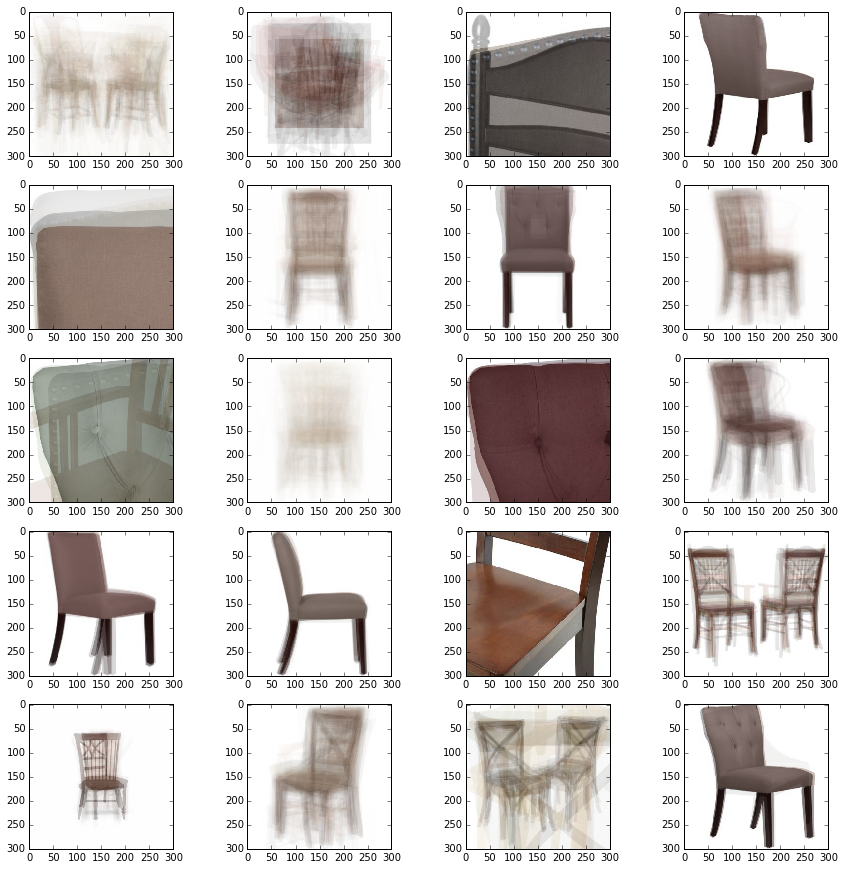

In [58]:
# PCA 50
plt.figure(figsize = (15,15))
for i in range(20):
    plt.subplot(5,4,i+1)
    skimage.io.imshow(label_image_avg[i])

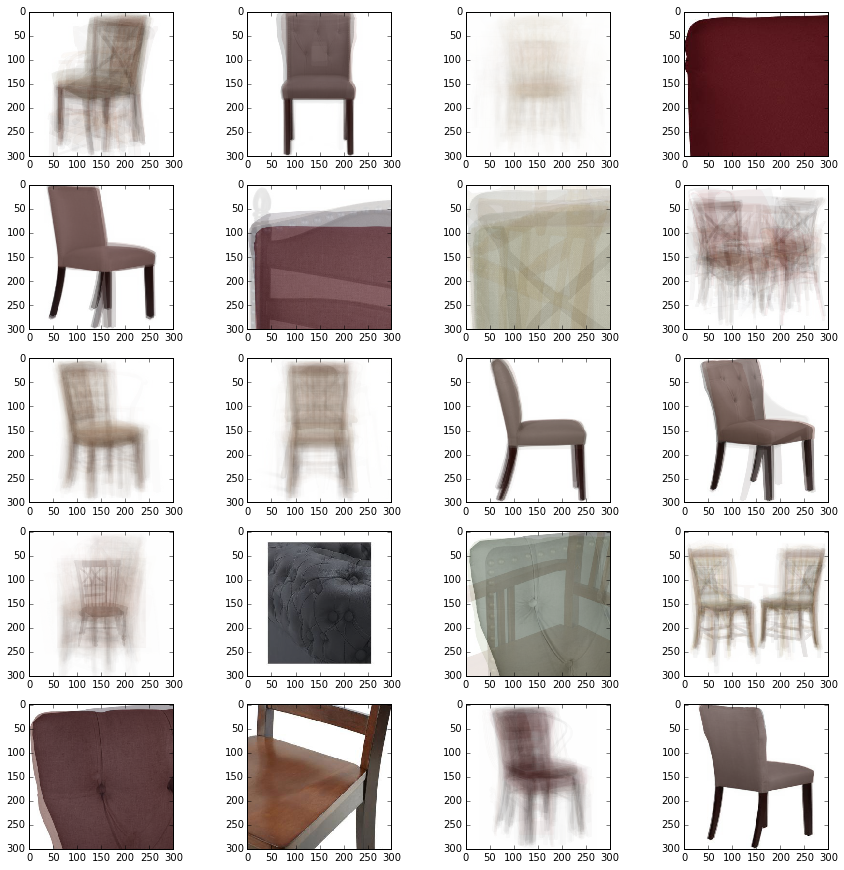

In [64]:
# PCA 100
plt.figure(figsize = (15,15))
for i in range(20):
    plt.subplot(5,4,i+1)
    skimage.io.imshow(label_image_avg[i])

# PCA 100 seems to work better

# Summary so far:

* dominant color: works
* color distribution: doesn't work as well as dominant color. May work better with furnitures with more complicated color patterns.


### with all chair photos:
general features, svd, PCA all seems to work well (to pick up big differences - chunks of shapes)

### With chair of the same angle (smaller differences):
* edge non-svd: 
    doesn't work well
* edge svd: 
    doesn't work well
* general feature non_svd: 
    just so so, may pick up more gray-scale difference than shape difference
* general feature svd 100:
    no good
* general feature svd 20:
    so so